# Gradient Boosting Machine for Classification

Table of Content:

* [Boosting Methodology for Classification](#methodology)

* [Gradient Boosting Machine for Classification](#model)

* [Examples of Gradient Boosting Machine for Classification](#example)

---

## <a id='methodology'>Boosting Methodology for Classification</a>

Outline
* Change loss function into cross entropy
* Calculate the probability of cross entropy using Softmax function
* Get the partial derivative of the overall loss function J
* The gradient descent function of GBM classification

Continued our previous discussion on [Gradient Boosting Machine for Regression](http://nbviewer.jupyter.org/github/johnnychiuchiu/Machine-Learning/blob/master/EnsembleMethods/Boosting/boosting.ipynb), the overall process for building a GBRT is as follows.
1. use response as the original resudual

2. Iterate until converge

    2.1 fit a model h, using X and residual. For GBRT, the model we use is Decision Tree. Note that we will denoted our first model as F in step 2.2
    
    2.2 Using the shrinkage parameter and the model h to update on the residual. The updated residual is calculated as $residual = residual - shrinkage \times h.predict(X)$. The model we built until this step is $F:= F + \rho * h$.
    
Note:
* The number of tree we generates is the number of iterations in the second step. In the second step, when building a model on residual, it is essentially the same as build a model on negative gradient. That's why it is called gradient boosting machine.
* Also, the final model $F$, is the addition of all the models generates in each iteration. For example, if our number of iteration is 100, when making a prediction, we will need to firstly make prediction using the first model, and the predicted output from the first model will be $shrinkage \times \text{predicted output}$. The final prediction will be the sum of $shrinkage \times \text{predicted output}$ using the same X.

**Cross Entropy & Softmax Function**

We can also use Gradient Boosting Machine for Classification problems. When doing gradient boosting, we are trying to minimize our overall cost function by using gradient descent. Gradient descent is executed by fitting a model on residual in each iteration. We have shown that if we use least square as the loss function, fitting a model on residual is essentially the same as fitting a model on negative gradient.

For classification, instead of using least square as the loss function, we will introduce another loss function called cross entropy, it is a way to capture the distance between two probability vectors. The smaller the cross entropy of the two vectors is, the nearer the distance is. Also, we will need another function called Softmax function, which turns a vector of scores into probabilities that sum up to 1. 

Once again, the same as GBRT, our overall loss function is defined as:
$$J = \sum_{i}^{n} L(y_i, F(x_i))$$

For each observation, we will calculate the loss by cross entropy. If we have two vectors, one is $y_k$, which is a dummy indicator of the response variable that takes the value of 1 if the ith observation belongs to class k and 0 otherwise; another is $p(x_i)$, which is a vector of length k with each element, denoted as $p_k(x_i)$, represent the probability of the observation $x_i$ belong to class k, then the formula is as follow:

$$L(y_i, p(x_i)) = - \sum_{k=1}^{K}y_k log(p_k(x_i))$$

Another question in mind is: How do we get the predicted probability of each class for each observation? As mentioned earlier, we use [Softmax function](https://en.wikipedia.org/wiki/Softmax_function) to help us. It is defined as follows:

$$p_k(x_i) = \frac{e^{score_k(x_i)}}{\sum_{j=1}^{K} e^{score_j(x_i)}}$$

Let's give an example of Softmax function using simple numbers.

In [2]:
import math
def mySoftmax(z):
    """Transform list of numbers into list of probabilities using Softmax function"""
    z_exp = [math.exp(i) for i in z]
    sum_z_exp = sum(z_exp)

    softmax = [round(i / sum_z_exp, 3) for i in z_exp]
    return(softmax)

In [3]:
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
print(mySoftmax(z))

[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


## <a id='model'>Gradient Boosting Machine for Classification</a>

In this paragraph, we are going to firstly introduce the overall process of Gradient Boosting Machine for Classification. We will see that the underlying algorithm is still a regression tree. Afterwards, we are going to explain the reason behind it in detail.

Let's assume our toy example with target value Y is [1,1,2,1]. We denote our train data as X, with a shape of 4*3, i.e., 4 observations with 3 features.

In [43]:
import pandas as pd
import numpy as np
y=pd.Series([1,1,2,1])
X=pd.DataFrame({'feature1': [1,2,3,2],
               'feature2': [2,2,7,3],
               'feature3': [1,2,3,1]})
print("X \n")
print(X)
print("\n")

print("y \n")
print(y)

X 

   feature1  feature2  feature3
0         1         2         1
1         2         2         2
2         3         7         3
3         2         3         1


y 

0    1
1    1
2    2
3    1
dtype: int64


**Step 1**

We transform our Y using One hot encoder, in this case, each element of Y will be a dummy indicator of the response variable that takes the value of 1 if the ith observation belongs to class k and 0 otherwise.

```
[ 1.,  0.],
[ 1.,  0.],
[ 0.,  1.],
[ 1.,  0.]
```

**Step 2**

We start out with a predicted probability that is uniform over all classes, i.e., $p_k(x_i)$= 1/(#unique class). The probabilty of each observation to be each class is the same across all the observations.  

```
[ 0.5,  0.5],
[ 0.5,  0.5],
[ 0.5,  0.5],
[ 0.5,  0.5]
```

**Step 3**

We calculate the initial residual as the difference between the predicted probability and the class label. The gradient is the difference between the associated dummy variable and the predicted probability of belonging to that class. This is essentially the "residuals" from the classification gradient boosting


```
[ 0.5, -0.5],
[ 0.5, -0.5],
[-0.5,  0.5],
[ 0.5, -0.5]
```

Iterate **Step 4** until convergence

**Step 4.1**

Fit a regression tree model for each class using X and the residual for that class. 

**Step 4.2**

Predict the score of X using the h calculated for each class. Using the shrinkage parameter and the model h to update on the residual for each class. The updated residual is calculated as $residual = residual - shrinkage \times h.predict(X)$. The model we built until this step is $F:= F + \rho * h$.
    





Notice that 
* the overall process of training a regression tree has still not changed, only now we must deal with the dummy variables, $y_k$ and fit a regression tree on the negative gradient for each dummy variable. In our sample above, we have $y_1$ =[1,1,0,1] and $y_2$=[0,0,1,0]

* When making a prediction using testing dataset, we will need to apply all the trees that we build in each iteration for each class. For example, in our example, we have 2 class and suppose we only run 10 iterations. We'll have 2*10=20 tree being built up in the model building process. The tree built up in iteration 1 for class 1 is used to calcuate the probability of every observation belong to class 1. The the predicted output from the first iteration will be $shrinkage \times \text{predicted output}$ for each class. The raw prediction will be the sum of $shrinkage \times \text{predicted output}$ using the same X for each class. To obtain the final prediction, we will need to apply softmax function to make the prediction of each class for each observation summing up to 1.

For example, the raw prediction can be something like
```
[ 0.49984154, -0.49984154],
[ 0.49984154, -0.49984154],
[-0.49952463,  0.49952463],
[ 0.49984154, -0.49984154]
```

The first list represent the raw probabilty of 1st observation being in each class. After applying softmax function to each list, we get:

```
[ 0.73099627,  0.26900373],
[ 0.73099627,  0.26900373],
[ 0.26912839,  0.73087161],
[ 0.73099627,  0.26900373]
```



**Some question in mind:**

* Why do we build our regression tree model on the "residual", which is defined by the difference between predicted probability and the dummy vector? What's the relationship of the residual to gradient descent?

> We can show that if the overall loss function is the sum of all the cross entropies, then the partial derivative of J is equals to "residual". That's why we use the build models on residual in each iteration. The derivation is [here](https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function).

## <a id='example'>Examples of Gradient Boosting Machine for Classification</a>

In [188]:
%matplotlib inline
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In practice, when fitting a GBM classifier, the most important parameters are similar to GBM Regressor:

* **n_estimators**: The number of boosting stages to perform. One of the most important parameter.
* **max_depth**: Depth of each individual tree. One of the most important parameter. 
* **loss**: Loss function. One of the most important parameter.
* **learning_rate**: default=0.1. learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. This parameter is the the shrinkage parameter **$\rho$** mentioned prevoisly.
* **min_samples_split**: The minimum number of samples required to split an internal node.
* **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
* **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
* **max_features**: The number of features to consider when looking for the best split. Choosing max_features < n_features leads to a reduction of variance and an increase in bias. The idea of choosing max_features < n_features is the same as random forest.
* **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default 0.

Some parameter that we wouldn't change are:
* **criterion**: The function to measure the quality of a split. Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. The default value of “friedman_mse” is generally the best as it can provide a better approximation in some cases.


In [227]:
def evaluate_classification_binary(y_test, y_pred):
    """ A function that calculate all the evaluation metrics for classification problems. """ 
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    
    return {'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred),
           'accuracy': metrics.accuracy_score(y_test, y_pred),
           'precision_score': metrics.precision_score(y_test, y_pred),
           'recall_score': metrics.recall_score(y_test, y_pred),
           'f1_score': metrics.f1_score(y_test, y_pred),
           'auc': metrics.auc(fpr, tpr)}

In [210]:
def viz_importance(model, feature_names, n_features):
    """Print out the relative importance of predictors"""
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:        
        importances = np.mean([tree.feature_importances_ 
                                       for tree in model.estimators_], axis=0)
    
    idx = np.argsort(importances)[::-1]
    names = feature_names[idx]
    scores = importances[idx]
    
    if hasattr(model, 'estimators_'):
        tree_importances = np.asarray([tree[0].feature_importances_
                                       for tree in model.estimators_])
        importances_std = np.std(tree_importances, axis = 0)
        scores_std = importances_std[idx]            
    
    print("Feature ranking:")
    for i in range(X.shape[1]):        
        print("%d. feature %s (%f, var(%f))" % (i + 1, names[i], scores[i], scores_std[i]))
    
    y_pos = np.arange(1, n_features + 1)
    plt.barh(y_pos, scores[::-1], align = 'center', xerr = scores_std[::-1])
    plt.yticks(y_pos, names[::-1])
    plt.xlabel('Importance')
    plt.title('Feature Importance Plot')   
    plt.show()

In [205]:
def fit_boosting_with_cv(X_train, y_train):
    """Gradient Boosting Machine for Classification"""
    seed = 7   
    num_trees = 100
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    print(results.mean())
    
    model.fit(X_train, y_train)
    
    return(model)

### Example for Binary Classification Problem

**Read Data**

We are going to use the [Pima Indians onset of Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes). It is a binary classficaiton problem.

In [202]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,-1]

**Make Train and Test Data**

In [203]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

In [204]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(514, 8)
(254, 8)
(514,)
(254,)


**Fit Model**

In [206]:
model = fit_boosting_with_cv(X_train, y_train)

0.764630467572


**Make Prediction & Evaluation**

In [207]:
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()

0.0    162
1.0     92
dtype: int64

In [209]:
evaluate_classification_binary(y_test, y_pred)

{'Confusion Matrix': array([[131,  37],
        [ 31,  55]]),
 'accuracy': 0.73228346456692917,
 'auc': 0.70964839424141746,
 'f1_score': 0.6179775280898876,
 'precision_score': 0.59782608695652173,
 'recall_score': 0.63953488372093026}

**Feature Importance**

Feature ranking:
1. feature plas (0.232535, var(0.213334))
2. feature pedi (0.183005, var(0.224189))
3. feature mass (0.143236, var(0.133171))
4. feature age (0.137555, var(0.136614))
5. feature preg (0.090516, var(0.136693))
6. feature pres (0.077394, var(0.119008))
7. feature skin (0.068498, var(0.146230))
8. feature test (0.067260, var(0.107529))


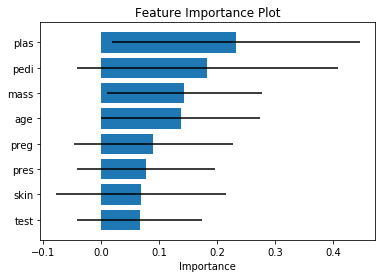

In [211]:
viz_importance(model, dataframe.columns[0:8], X.shape[1])

In this case, feature importance is the average decrease in MSE due to spliting over a given predictor, averaged over the number of trees, which equals the value of the parameter n_estimators.

In the plot above, we see that `pedi` has the highest mean feature importance. However, we see that the variance of all the feature importance are very large. It seems weird at the first look, but it actually make sense after a second thought. We could imagine the importance to change with different amount of iterations as well as different combinations of features. It would make sense to have variable importance change with using different features and over boosting iterations. In some iteration, weak features might outperform a single strong features. In other words, boosting will change its focus during iterations. That's why we see the variance is so large for all of our features.

### Example for Multiple Label Classification Problem

To implement gradient boosting for multiple label classification, we are going to use the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality). You can download the data from this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). The goal is to model wine quality based on the features we have in the dataset.

**Read Data**

In [230]:
wine=pd.read_csv('../_data/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Make training and testing data**

In [215]:
# train/test split the features and response column
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)

**Fit Model**

In [217]:
model_wine = fit_boosting_with_cv(X_train, y_train)

0.645041830709


**Make Prediction & Evaluation**

In [219]:
y_pred = model_wine.predict(X_test)
pd.Series(y_pred).value_counts()

5    140
6    136
7     33
8      5
4      5
3      1
dtype: int64

In [228]:
print('gbm library: ', metrics.accuracy_score(y_test, y_pred))

gbm library:  0.678125


**Feature Importance**

Feature ranking:
1. feature volatile acidity (0.145143, var(0.246263))
2. feature alcohol (0.109728, var(0.119414))
3. feature sulphates (0.099735, var(0.081396))
4. feature pH (0.091595, var(0.095320))
5. feature total sulfur dioxide (0.091060, var(0.119889))
6. feature chlorides (0.086596, var(0.231213))
7. feature density (0.086553, var(0.134173))
8. feature residual sugar (0.081767, var(0.175914))
9. feature fixed acidity (0.081529, var(0.093929))
10. feature citric acid (0.078819, var(0.191199))
11. feature free sulfur dioxide (0.047474, var(0.155757))


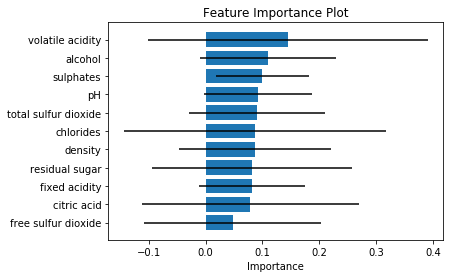

In [229]:
viz_importance(model_wine, wine.columns[0:11], X.shape[1])

### Reference
* [Ensemble Machine Learning Algorithms blog post from Machine Learning Mastery](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)
* [Feature importance in gradient boosted trees](https://stats.stackexchange.com/questions/219769/feature-importance-in-gradient-boosted-trees)
* [GRADIENT BOOSTING MACHINE (GBM) from Ethen](http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/trees/gbm/gbm.ipynb)
* [A Gentle Introduction to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)